# Historical Voting Patterns
- In this notebook I am going to be using Data Science techniques to determine if a county in Colorado is considered a Republican, Democrat or a swing county. I have data from top of the ticket elections from 2012, 2014, 2016.
- I pulled the data from the Colorado Election Results Archives on the Colorado Secretary of State's website.
    - https://www.sos.state.co.us/pubs/elections/Results/Archives.html

In [8]:
import pandas as pd
import glob, os
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
pd.set_option("display.max_rows", 70)

Each CSV looks like this when loaded into a DataFrame

In [10]:
house_2012 = pd.read_csv("./data/house_2012.csv")

In [11]:
house_2012.head()

,County,DEM_2012_house,REP_2012_house,total_votes
0,CountyArapahoe,"Diana DeGette (DEM)13,705","Danny Stroud (REP)9,087","Total24,256"
1,CountyDenver,"Diana DeGette (DEM)207,165","Danny Stroud (REP)63,082","Total284,205"
2,CountyJefferson,"Diana DeGette (DEM)16,709","Danny Stroud (REP)21,048","Total39,767"
3,CountyBoulder,"Jared Polis (DEM)93,758","Kevin Lundberg (REP)27,623","Total128,237"
4,CountyBroomfield,"Jared Polis (DEM)16,208","Kevin Lundberg (REP)13,829","Total31,667"


Taking each CSV and transforming them into the format I want and merging them together.

In [14]:
def county_history(folder):
    counties = ['Adams', 'Alamosa', 'Arapahoe', 'Archuleta', 'Baca', 'Bent', 'Boulder',
       'Broomfield', 'Chaffee', 'Cheyenne', 'Clear Creek', 'Conejos',
       'Costilla', 'Crowley', 'Custer', 'Delta', 'Denver', 'Dolores',
       'Douglas', 'Eagle', 'El Paso', 'Elbert', 'Fremont', 'Garfield',
       'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 'Huerfano', 'Jackson',
       'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake', 'Larimer',
       'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral', 'Moffat',
       'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray', 'Park', 'Phillips',
       'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco', 'Rio Grande', 'Routt',
       'Saguache', 'San Juan', 'San Miguel', 'Sedgwick', 'Summit', 'Teller',
       'Washington', 'Weld', 'Yuma']
    vote_history = pd.DataFrame(data = counties, columns=["county"])
    file_list = [file for file in glob.glob(folder+"*.csv")]
    file_list.sort()
    for file in file_list:
        race = file[7:-4]
        df = pd.read_csv(file)
        df.columns = ["county", "dem_"+race, "rep_"+race, "total_votes"]
        df["county"] = df["county"].apply(lambda x : x.replace("County", ""))
        df["dem_"+race] = df["dem_"+race].apply(lambda x: x.split(")")[-1].replace(",","")).astype(int)
        df["rep_"+race] = df["rep_"+race].apply(lambda x: x.split(")")[-1].replace(",","")).astype(int)
        df["total_votes"] = df["total_votes"].apply(lambda x : x.replace("Total", "").replace(",","")).astype(int)
        df = df.groupby("county", sort=False).sum().reset_index()
#        print(df.head(8))
        df["dem_"+race+"_%"] = df["dem_"+race] / df["total_votes"]
        df["rep_"+race+"_%"] = df["rep_"+race] / df["total_votes"]
        df.drop(["dem_"+race, "rep_"+race, "total_votes"], axis=1, inplace=True)
        vote_history = pd.merge(vote_history, df, how="left", on="county")
    
    return vote_history
        
        
        

In [15]:
county_vote_history = county_history("./data/")

This is the outcome of the function above

In [16]:
county_vote_history.head(10)

,county,dem_gov_2014_%,rep_gov_2014_%,dem_house_2012_%,rep_house_2012_%,dem_house_2014_%,rep_house_2014_%,dem_house_2016_%,rep_house_2016_%,dem_pres_2012_%,rep_pres_2012_%,dem_pres_2016_%,rep_pres_2016_%,dem_senate_2014_%,rep_senate_2014_%,dem_senate_2016_%,rep_senate_2016_%
0,Adams,0.501126,0.444168,0.526886,0.401861,0.511630,0.470264,0.514574,0.426280,0.571123,0.402724,0.498552,0.413482,0.476951,0.448761,0.526509,0.412360
1,Alamosa,0.509386,0.433133,0.486207,0.458622,0.425093,0.515413,0.495194,0.462774,0.567535,0.402829,0.459576,0.438968,0.474155,0.456665,0.529977,0.415089
2,Arapahoe,0.520078,0.439368,0.485311,0.450000,0.455291,0.490463,0.457761,0.478489,0.539042,0.439863,0.527590,0.386252,0.480201,0.464848,0.540040,0.409837
3,Archuleta,0.394250,0.555210,0.339208,0.595602,0.297932,0.634433,0.356941,0.597823,0.397832,0.574993,0.340646,0.581006,0.372272,0.569045,0.379206,0.561500
4,Baca,0.217578,0.725616,0.247859,0.698237,0.178631,0.754591,0.142857,0.815436,0.221747,0.740266,0.131444,0.814213,0.189887,0.739107,0.269878,0.687091
5,Bent,0.346835,0.593038,0.376142,0.572273,0.311182,0.622364,0.332273,0.641759,0.419670,0.553553,0.306175,0.616502,0.321406,0.606390,0.422315,0.539103
6,Boulder,0.681187,0.260073,0.689809,0.257771,0.685239,0.296476,0.694179,0.258321,0.696890,0.278447,0.703362,0.220022,0.685858,0.273544,0.679873,0.246233
7,Broomfield,0.510685,0.443318,0.511826,0.436701,0.504131,0.495869,0.528920,0.410480,0.517619,0.457882,0.523508,0.381189,0.482018,0.464779,0.530655,0.411749
8,Chaffee,0.471398,0.482033,0.000000,0.586237,0.461394,0.538606,0.413243,0.530998,0.486140,0.484611,0.434489,0.479200,0.452146,0.493485,0.467010,0.478110
9,Cheyenne,0.159113,0.784957,0.130798,0.828386,0.099704,0.839092,0.117920,0.848654,0.157365,0.813358,0.119782,0.839383,0.117534,0.816956,0.201835,0.759633


In [17]:
county_vote_history.shape

(64, 17)

# Grouping counties into 3 clusters
- This is to group all counties into three categories:
    - Democrat
    - Republican
    - Swing
- I will be using KMeans so I can set the number to cluster the model is creating to 3.

In [18]:
X = county_vote_history.drop("county", axis=1)
y = county_vote_history["county"]

In [19]:
model = KMeans(n_clusters=3, random_state=33).fit(X)

In [20]:
X["labels"] = model.labels_

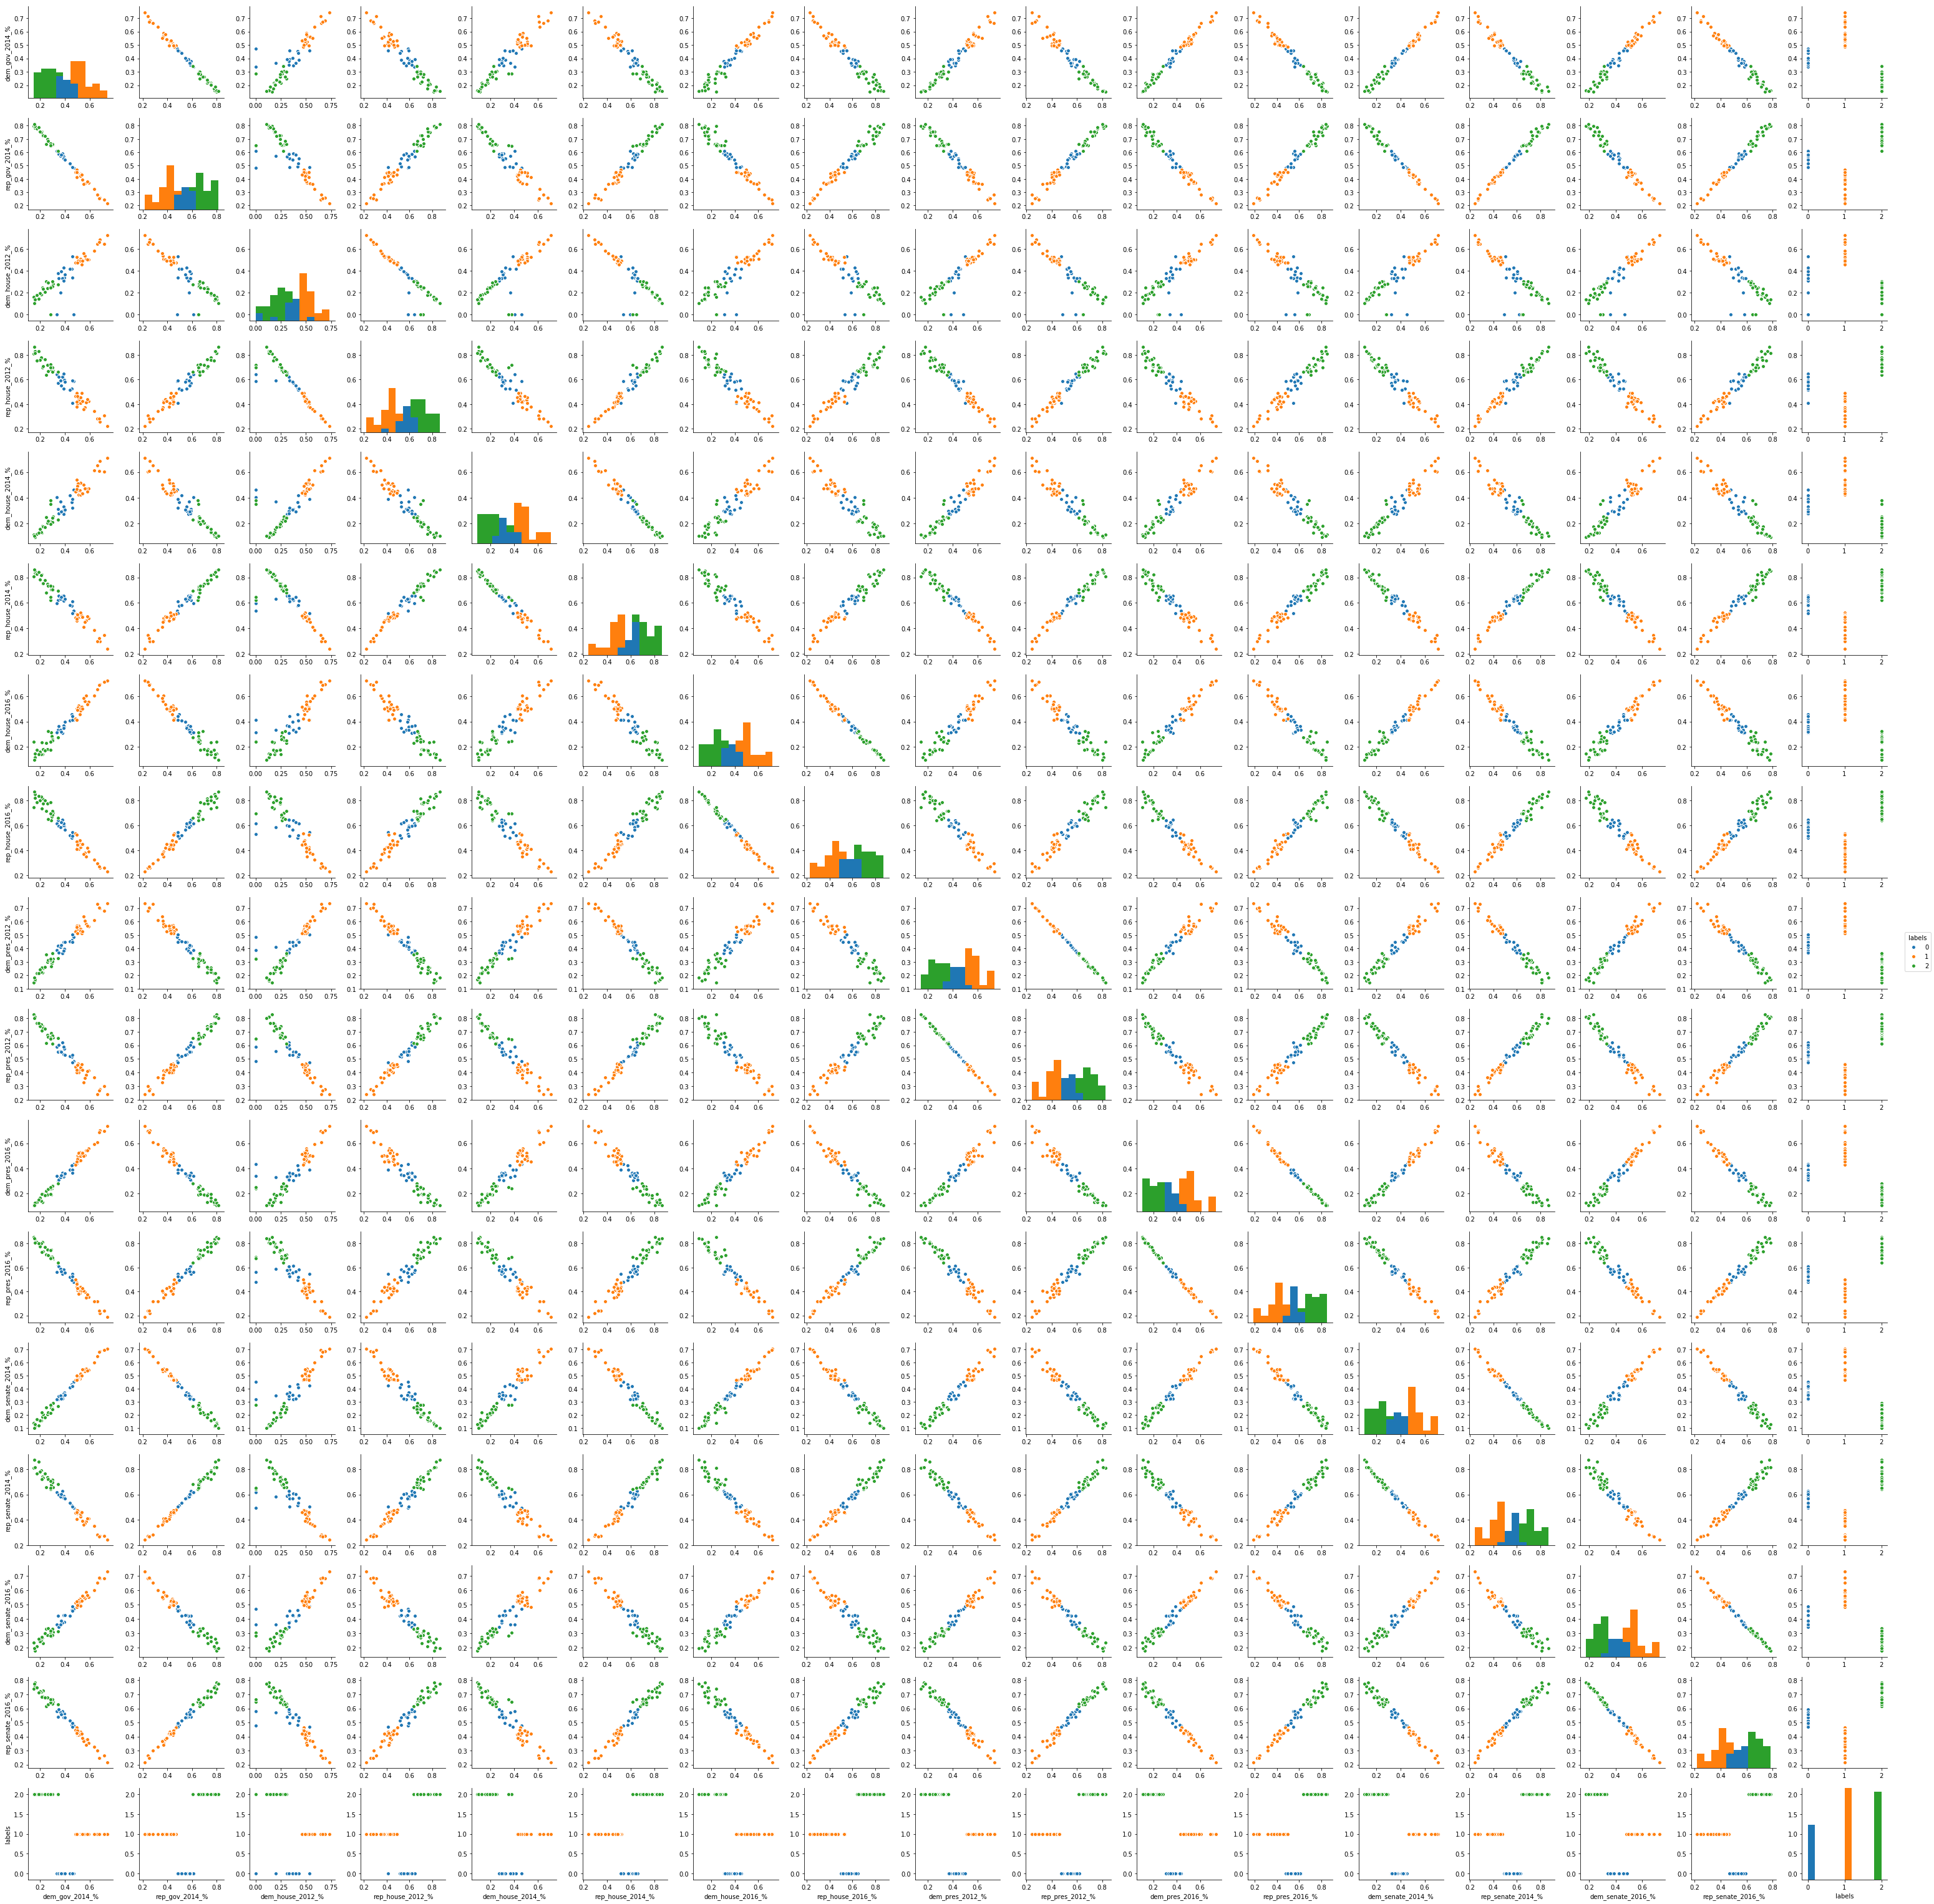

In [21]:
sns.pairplot(X, hue="labels")

In [22]:
county_history_df = pd.concat([county_vote_history,pd.DataFrame(data = model.labels_, columns=["label"])], axis=1)

Looking at the graphs above I can determine what 0, 1, and 2 represent. 

In [23]:
county_history_df["label"] = county_history_df["label"].map({2:"REP", 1:"DEM", 0:"Swing"})

In [24]:
county_history_df.head()

,county,dem_gov_2014_%,rep_gov_2014_%,dem_house_2012_%,rep_house_2012_%,dem_house_2014_%,rep_house_2014_%,dem_house_2016_%,rep_house_2016_%,dem_pres_2012_%,rep_pres_2012_%,dem_pres_2016_%,rep_pres_2016_%,dem_senate_2014_%,rep_senate_2014_%,dem_senate_2016_%,rep_senate_2016_%,label
0,Adams,0.501126,0.444168,0.526886,0.401861,0.511630,0.470264,0.514574,0.426280,0.571123,0.402724,0.498552,0.413482,0.476951,0.448761,0.526509,0.412360,DEM
1,Alamosa,0.509386,0.433133,0.486207,0.458622,0.425093,0.515413,0.495194,0.462774,0.567535,0.402829,0.459576,0.438968,0.474155,0.456665,0.529977,0.415089,DEM
2,Arapahoe,0.520078,0.439368,0.485311,0.450000,0.455291,0.490463,0.457761,0.478489,0.539042,0.439863,0.527590,0.386252,0.480201,0.464848,0.540040,0.409837,DEM
3,Archuleta,0.394250,0.555210,0.339208,0.595602,0.297932,0.634433,0.356941,0.597823,0.397832,0.574993,0.340646,0.581006,0.372272,0.569045,0.379206,0.561500,Swing
4,Baca,0.217578,0.725616,0.247859,0.698237,0.178631,0.754591,0.142857,0.815436,0.221747,0.740266,0.131444,0.814213,0.189887,0.739107,0.269878,0.687091,REP


All Colorado counties with their corresponding label 

In [25]:
county_history_df[["county", "label"]]

,county,label
0,Adams,DEM
1,Alamosa,DEM
2,Arapahoe,DEM
3,Archuleta,Swing
4,Baca,REP
5,Bent,Swing
6,Boulder,DEM
7,Broomfield,DEM
8,Chaffee,Swing
9,Cheyenne,REP


Exporting the CSV for further use.

In [26]:
#county_history_df.to_csv("county_vote_labeling.csv", index=False)

Graphs showing each elections with the corresponding labels for each county. 

![House_12](./Images/2012 House.png)

![Pres_12](./Images/2012 Pres.png)

![House_14](./Images/2014 House.png)

![Gov_14](./Images/2014 Gov.png)

![Senate_14](./Images/2014 Senate.png)

![House_16](./Images/2016 House.png)

![Senate_16](./Images/2016 Senate.png)

![Pres_16](./Images/2016 Pres.png)